# Data Analysis
# Uber - NewYork - April2014
[Original Source](https://www.youtube.com/watch?v=Q73ADVZCqSU "Uber and Pandas")

In [3]:
import pandas as pd
import seaborn

In [9]:
data = pd.read_csv("uber-raw-data-apr14.csv", nrows=20000) #usecols=[0,1])

###### Display Data Set

In [10]:
data.head(5)

,Date/Time,Lat,Lon,Base
0,4/1/2014 0:11:00,40.7690,-73.9549,B02512
1,4/1/2014 0:17:00,40.7267,-74.0345,B02512
2,4/1/2014 0:21:00,40.7316,-73.9873,B02512
3,4/1/2014 0:28:00,40.7588,-73.9776,B02512
4,4/1/2014 0:33:00,40.7594,-73.9722,B02512


# Load CSV to do some data manipulation

#### DataFrame Methods and Attributes
* .head()
* .shape(),
* .tail(), 
* .dtypes, 
* .describe(), 
* .groubby(), 
* .sort_values("column")
* .map(function(to every of a dataSeries) is equal to apply( is used for df)
* .len

> `dataframe.groupby("column")`
_This Method returns a Groupby Object which can be accessed via Index values of Throught Columns_
_Groupby, index by column name, or by value of groupby column, or create a MulitIndex DataFrame, with groupby("Hour day".split())

### Pandas Series Method and Attributes
1. value_counts()
1. .len


###### Encounter the **Timestamp** object

Introduction to Timestamp objects in pandas


Splitting a String into tuple and then returning every element as an efficient way of text parsing

In [19]:
dt = "4/1/2014 0:11:00"
date, hours = dt.split(" ")
m,d,y = date.split("/"); 
print(m,d,y)

4 1 2014


In [21]:
timestamp_obj = pd.to_datetime("4/1/2014 0:11:00")
timestamp_obj

Timestamp('2014-04-01 00:11:00')

> Series.to_datetime can convert many arguments into a Timestamp object
including datetime.datetime objects

In [50]:
# Pandas Function to_datetime
# Timestamp is a Pandas Object
pd.to_datetime("2014/1/4")

Timestamp('2014-01-04 00:00:00')

In [41]:
# Timestap method ctime
timestamp_obj.ctime()

'Tue Apr  1 00:11:00 2014'

In [13]:
data.dtypes

Date/Time     object
Lat          float64
Lon          float64
Base          object
dtype: object

In [53]:
# Converting the DateTime Column to Timestamp Objects
data["Date/Time"] = data["Date/Time"].map(pd.to_datetime)

In [54]:
# Adding a Column of the day of the month by Transforming the Date/Time Column to an Timestamp object 
def getdom(dt):
    return dt.day

data["dom"] = data["Date/Time"].map(getdom)

### Visualizing Uber Data

In [56]:
from matplotlib import pyplot as plt
%matplotlib inline

Text(0.5, 0, 'Day Number')

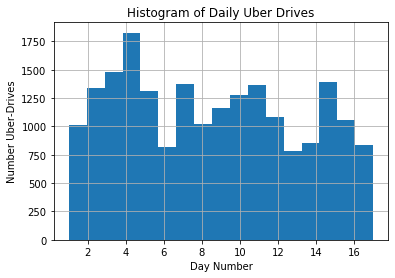

In [86]:
plt.hist(data["dom"], bins=len(data["dom"].unique()),)
plt.grid()
plt.title("Histogram of Daily Uber Drives")
plt.ylabel("Number Uber-Drives")
plt.xlabel("Day Number")

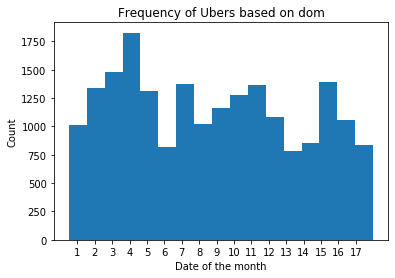

In [85]:
plt.hist(data.dom, bins=(len(data["dom"].unique())), range=(0.5,18))
plt.xlabel("Date of the month")
plt.ylabel("Count")
plt.title("Frequency of Ubers based on dom")
plt.xticks(range(1,18),range(1,18));

In [87]:
data.dom.value_counts()

4     1827
3     1482
15    1391
7     1376
11    1362
2     1336
5     1309
10    1274
9     1167
12    1087
16    1059
8     1023
1     1011
14     854
17     839
6      820
13     783
Name: dom, dtype: int64

In [105]:
# DataFrame.groupby("column") --- Creates GroupByObject key unique column Value, value: Dataframe with all rows
for k,y in data.groupby("dom"):
    print(k,len(y))

1 14546
2 17474
3 20701
4 26714
5 19521
6 13445
7 19550
8 16188
9 16843
10 20041
11 20420
12 18170
13 12112
14 12674
15 20641
16 17717
17 20973
18 18074
19 14602
20 11017
21 13162
22 16975
23 20346
24 23352
25 25095
26 24925
27 14677
28 15475
29 22835
30 36251


In [106]:
# Day of the Month sorted by Counts/Frequency
new_sorted = data_new.sort_values()
new_sorted.sort_index()

dom
1     1011
2     1336
3     1482
4     1827
5     1309
6      820
7     1376
8     1023
9     1167
10    1274
11    1362
12    1087
13     783
14     854
15    1391
16    1059
17     839
dtype: int64

In [102]:
# groupby.apply leads to applying a specific method to every individaul dataframe of the groupby object
def count_rows(df):
    return len(df)

data_new = data.groupby("dom").apply(count_rows)

In [109]:
def gethour(dt):
    return dt.hour

In [110]:
data["hour"] = data["Date/Time"].map(gethour)

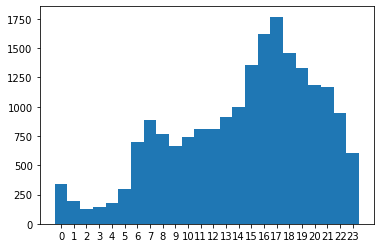

In [111]:
plt.hist(data["hour"], range=(-0.5,23.5), bins=24)
plt.xticks(range(0,24),range(0,24));

In [88]:
"Mon Tue Wed Thur Fri".split()

['Mon', 'Tue', 'Wed', 'Thur', 'Fri']

In [112]:
data[data["hour"] == 0].sort_values(["dom", "Lon"])

,Date/Time,Lat,Lon,Base,dom,hour
5,2014-04-01 00:33:00,40.7383,-74.0403,B02512,1,0
1,2014-04-01 00:17:00,40.7267,-74.0345,B02512,1,0
8,2014-04-01 00:55:00,40.7524,-73.9960,B02512,1,0
6,2014-04-01 00:39:00,40.7223,-73.9887,B02512,1,0
2,2014-04-01 00:21:00,40.7316,-73.9873,B02512,1,0
...,...,...,...,...,...,...
19165,2014-04-17 00:26:00,40.7556,-73.9919,B02512,17,0
19163,2014-04-17 00:07:00,40.7651,-73.9877,B02512,17,0
19162,2014-04-17 00:04:00,40.6719,-73.9641,B02512,17,0
19161,2014-04-17 00:00:00,40.7196,-73.9621,B02512,17,0


GroupBy Hours and Dom, we cann see that depending on on the hour at certain day of the month people more frequently use cabs at that time

In [125]:
data.groupby("hour dom".split()).apply(count_rows).unstack()

dom,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
hour,,,,,,,,,,,,,,,,,
0,9.0,9.0,17.0,14.0,45.0,64.0,4.0,11.0,9.0,10.0,12.0,42.0,63.0,6.0,9.0,8.0,8.0
1,4.0,4.0,7.0,12.0,31.0,47.0,1.0,1.0,8.0,2.0,8.0,28.0,32.0,3.0,1.0,2.0,4.0
2,4.0,3.0,4.0,3.0,17.0,24.0,3.0,6.0,6.0,5.0,12.0,15.0,17.0,2.0,1.0,1.0,7.0
3,4.0,5.0,5.0,7.0,10.0,11.0,7.0,6.0,6.0,8.0,16.0,13.0,17.0,5.0,6.0,9.0,6.0
4,9.0,10.0,7.0,14.0,7.0,10.0,15.0,10.0,12.0,12.0,20.0,8.0,11.0,9.0,8.0,11.0,7.0
5,24.0,22.0,17.0,21.0,12.0,9.0,23.0,23.0,21.0,23.0,25.0,8.0,5.0,22.0,16.0,12.0,14.0
6,45.0,65.0,58.0,67.0,12.0,11.0,47.0,53.0,52.0,58.0,52.0,8.0,9.0,51.0,34.0,41.0,38.0
7,63.0,77.0,74.0,88.0,13.0,17.0,62.0,73.0,67.0,48.0,67.0,13.0,7.0,60.0,49.0,49.0,58.0
8,50.0,70.0,59.0,68.0,21.0,25.0,42.0,55.0,49.0,48.0,57.0,13.0,20.0,48.0,49.0,39.0,50.0


In [125]:
data.groupby("hour dom".split()).apply(count_rows).unstack()

dom,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
hour,,,,,,,,,,,,,,,,,
0,9.0,9.0,17.0,14.0,45.0,64.0,4.0,11.0,9.0,10.0,12.0,42.0,63.0,6.0,9.0,8.0,8.0
1,4.0,4.0,7.0,12.0,31.0,47.0,1.0,1.0,8.0,2.0,8.0,28.0,32.0,3.0,1.0,2.0,4.0
2,4.0,3.0,4.0,3.0,17.0,24.0,3.0,6.0,6.0,5.0,12.0,15.0,17.0,2.0,1.0,1.0,7.0
3,4.0,5.0,5.0,7.0,10.0,11.0,7.0,6.0,6.0,8.0,16.0,13.0,17.0,5.0,6.0,9.0,6.0
4,9.0,10.0,7.0,14.0,7.0,10.0,15.0,10.0,12.0,12.0,20.0,8.0,11.0,9.0,8.0,11.0,7.0
5,24.0,22.0,17.0,21.0,12.0,9.0,23.0,23.0,21.0,23.0,25.0,8.0,5.0,22.0,16.0,12.0,14.0
6,45.0,65.0,58.0,67.0,12.0,11.0,47.0,53.0,52.0,58.0,52.0,8.0,9.0,51.0,34.0,41.0,38.0
7,63.0,77.0,74.0,88.0,13.0,17.0,62.0,73.0,67.0,48.0,67.0,13.0,7.0,60.0,49.0,49.0,58.0
8,50.0,70.0,59.0,68.0,21.0,25.0,42.0,55.0,49.0,48.0,57.0,13.0,20.0,48.0,49.0,39.0,50.0


In [138]:
data.groupby("hour")["Date/Time"].count().sort_values(ascending=False)

hour
17    1768
16    1623
18    1458
15    1352
19    1327
20    1187
21    1169
14     998
22     945
13     913
7      885
11     812
12     809
8      763
10     737
6      701
9      662
23     608
0      340
5      297
1      195
4      180
3      141
2      130
Name: Date/Time, dtype: int64

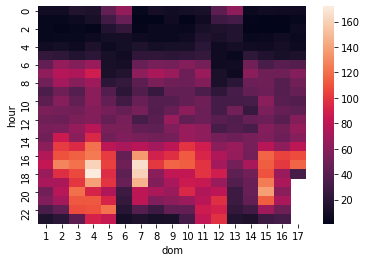

In [123]:
seaborn.heatmap(data.groupby("hour dom".split()).apply(count_rows).unstack())

No handles with labels found to put in legend.


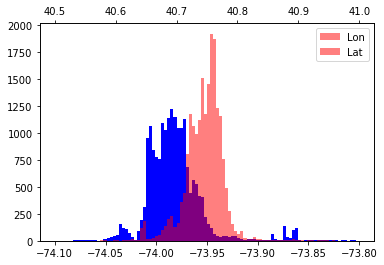

In [163]:
plt.hist(data["Lon"],bins=100,range=(-74.1,-73.8), color="b", label="lon")
plt.twiny()
plt.legend(loc="upper left")
plt.hist(data["Lat"],bins=100, range=(40.5,41),alpha=0.5, color="r", label= 'Hes');
plt.legend("Lon Lat".split())

(0, 1000)

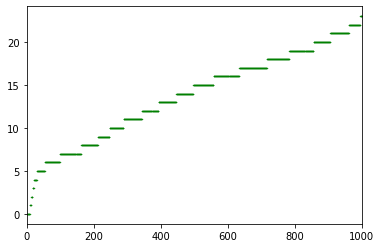

In [172]:
plt.plot(data["hour"],".", ms=1, color="green")
plt.xlim(0,1000)

(40.6, 41.0)

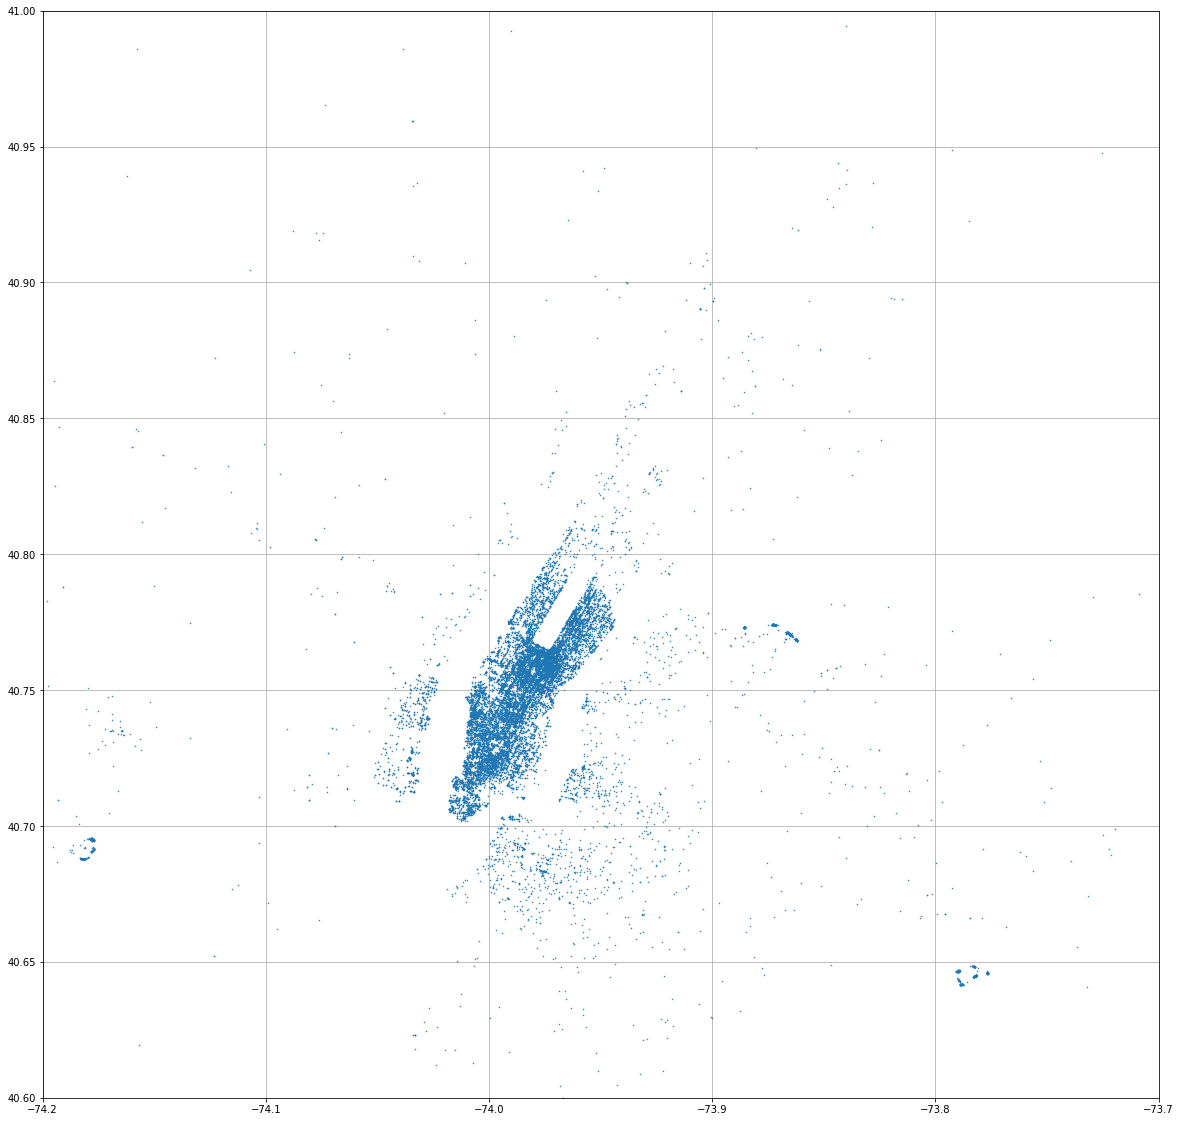

In [181]:
plt.figure(figsize=(20,20))
plt.plot(data["Lon"], data["Lat"],".", ms=1)
plt.grid()
plt.xlim(-74.2,-73.7)
plt.ylim(40.6, 41.0)